In [1]:
from simulate import *

WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


/Users/Danielyahalomi/Documents/Columbia/Research/RomanAstrometry/Code/simulate.py:349: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/Danielyahalomi/Documents/Columbia/Research/RomanAstrometry/Code/simulate.py:419: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/Danielyahalomi/Documents/Columbia/Research/RomanAstrometry/Code/simulate.py:440: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


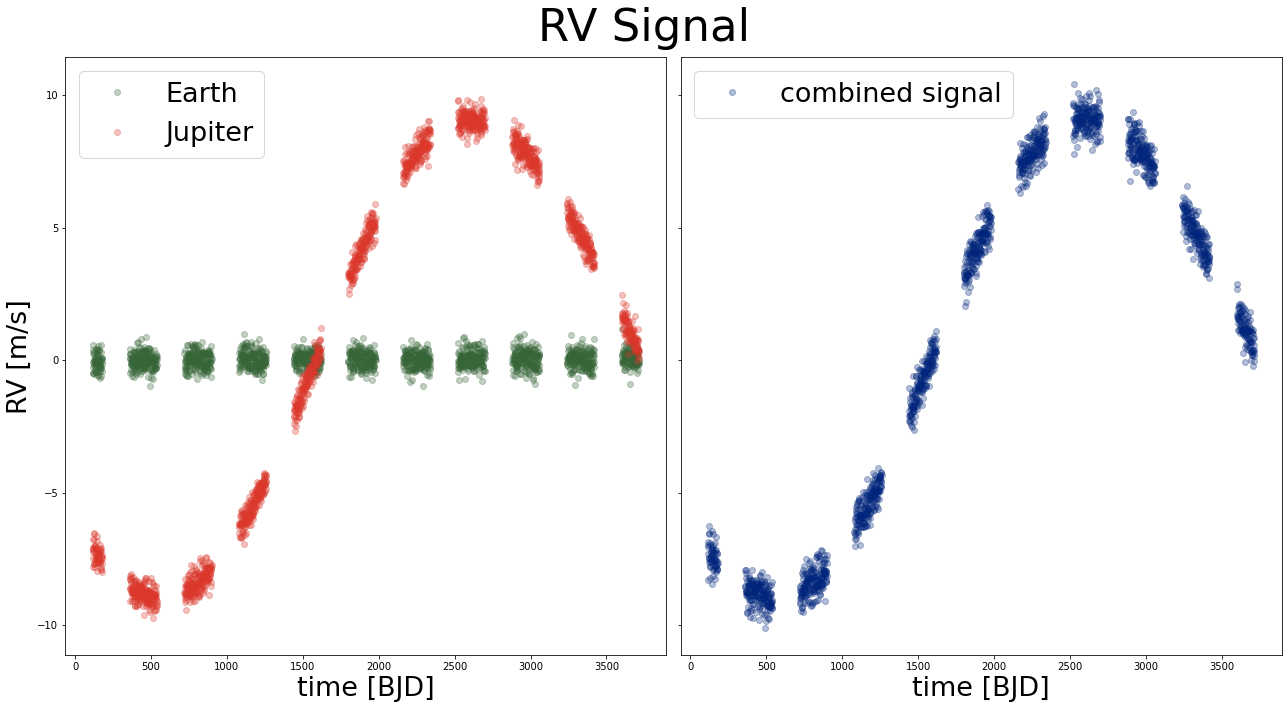

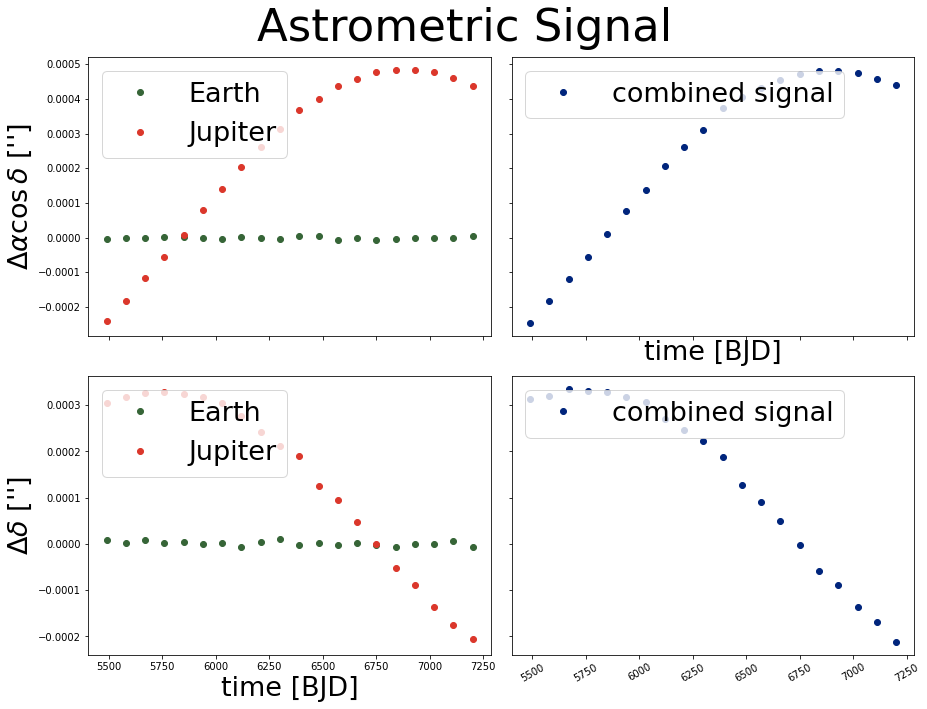

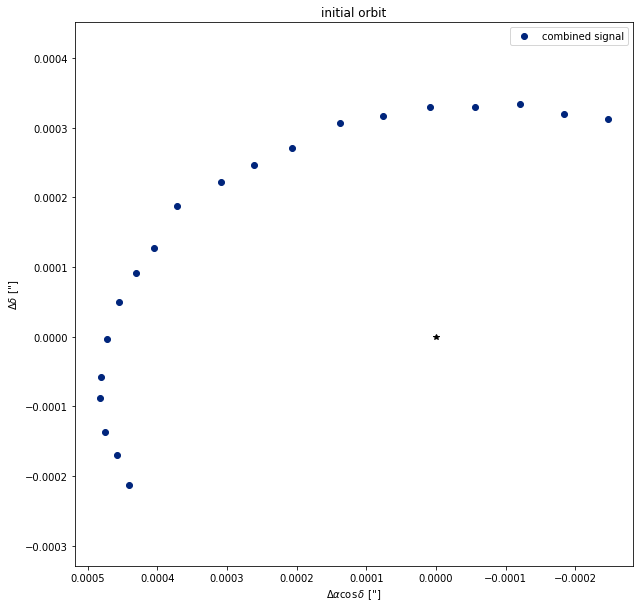

In [10]:
T_subtract = 2454000
# orbital parameters from https://www.princeton.edu/~willman/planetary_systems/Sol/
# BJD determined by converting values above using https://ssd.jpl.nasa.gov/tc.cgi#top

P_earth = 365.256
e_earth = 0.0167
Tper_earth= 2454115.5208333 - T_subtract
omega_earth = np.radians(102.9)
Omega_earth = np.radians(0.0)
inclination_earth = np.radians(45.0)
m_earth = 1*3.00273e-6 #units m_sun



P_jup = 4327.631
e_jup = 0.0484
Tper_jup = 2455633.7215278 - T_subtract
omega_jup = np.radians(274.3) - 2*np.pi
Omega_jup = np.radians(100.4)
inclination_jup = np.radians(1.31) + inclination_earth
m_jup = 317.83*3.00273e-6 #units m_sun


m_sun = 333030 #earth masses


times_observed_astrometry_gaia = []
t_0 = int(Tper_earth)
for ii in range(t_0, t_0+3600):
    if ii % 90 == 0:
        times_observed_astrometry_gaia.append(ii)

t_1 =  times_observed_astrometry_gaia[-1]+1800
times_observed_astrometry_roman = []
for ii in range(t_1, t_1+1800):
    if ii % 90 == 0:
        times_observed_astrometry_roman.append(ii)    

        
times_observed_rv = []
t_0 = int(Tper_earth)
add_data = True
for ii in range(t_0, t_0+3600):
    
    if ii % 180 == 0:
        if add_data:
            add_data = False
        else:
            add_data = True
       
    if add_data:
        times_observed_rv.append(ii)
        

orbit_params_earth = [P_earth, e_earth, Tper_earth, omega_earth, Omega_earth, inclination_earth, m_earth]
orbit_params_jup = [P_jup, e_jup, Tper_jup, omega_jup, Omega_jup, inclination_jup, m_jup]

n_planets = 2
orbit_params = [orbit_params_earth, orbit_params_jup]


sigma_rv = 0.3

sigma_ra = 6e-5
sigma_dec = 6e-5
parallax = 0.1



times, rv_results, ra_results, dec_results = simulate_data(
    n_planets, 
    sigma_rv, 
    sigma_ra,
    sigma_dec,
    parallax,
    orbit_params,
    times_observed_rv = times_observed_rv,
    times_observed_astrometry = times_observed_astrometry_gaia
    )


[[times_rv, times_observed_rv, times_astrometry, times_observed_astrometry],
[rv_orbit, rv_orbit_sum, rv_sim, rv_sim_sum],
[ra_orbit, ra_orbit_sum, ra_sim, ra_sim_sum],
[dec_orbit, dec_orbit_sum, dec_sim, dec_sim_sum]]  = times, rv_results, ra_results, dec_results







### add roman astrometry
orbit_params_earth = [P_earth, e_earth, Tper_earth, omega_earth, Omega_earth, inclination_earth, m_earth]
orbit_params_jup = [P_jup, e_jup, Tper_jup, omega_jup, Omega_jup, inclination_jup, m_jup]

n_planets = 2
orbit_params = [orbit_params_earth, orbit_params_jup]


sigma_rv = 0.3

sigma_ra = 10e-6
sigma_dec = 10e-6
parallax = 0.1



times, rv_results, ra_results, dec_results = simulate(
    n_planets, 
    sigma_rv, 
    sigma_ra,
    sigma_dec,
    parallax,
    orbit_params,
    ['#366537', '#db372b', '#00257c'],
    ['Earth', 'Jupiter'],
    times_observed_rv = times_observed_rv,
    times_observed_astrometry = times_observed_astrometry_roman
    )

times_astrometry = np.append(times_astrometry, times[2], axis=0)

times_observed_astrometry = np.append(times_observed_astrometry, times[3], axis=0)

ra_orbit = np.append(ra_orbit, ra_results[0], axis=0)
ra_orbit_sum = np.append(ra_orbit_sum, ra_results[1], axis=0)
ra_sim = np.append(ra_sim, ra_results[2], axis=0)
ra_sim_sum = np.append(ra_sim_sum, ra_results[3], axis=0)

dec_orbit = np.append(dec_orbit, dec_results[0], axis=0)
dec_orbit_sum = np.append(dec_orbit_sum, dec_results[1], axis=0)
dec_sim = np.append(dec_sim, dec_results[2], axis=0)
dec_sim_sum = np.append(dec_sim_sum, dec_results[3], axis=0)





In [13]:
def plot_rv(
    n_planets, 
    rv_orbit, 
    rv_orbit_sum, 
    rv_sim, 
    rv_sim_sum, 
    times_rv, 
    times_observed_rv,
    colors,
    planet_names):
    
    
    
    fig, ax = plt.subplots(1, 2, figsize = [18,10], sharey='row')
    fig.suptitle("Terra Hunting Simulated RV Data", fontsize = 45)
    ax0 = ax[0]
    ax1 = ax[1]
    
    
    if n_planets > 1:
        for ii in range(0, n_planets):
            ax0.plot(times_observed_rv, rv_sim.T[ii], 'o', color = colors[ii], label = planet_names[ii], alpha = 0.3)
    else:
        ax0.plot(times_observed_rv, rv_sim, 'o', color = colors[0], label = planet_names[0], alpha = 0.3)
    
    ax0.legend(fontsize = 27, loc = 2)
    ax0.set_xlabel("time [days]", fontsize = 27)
    ax0.set_ylabel("Radial Velocity [m/s]", fontsize = 27)

    ax1.plot(times_observed_rv, rv_sim_sum, 'o', color = colors[n_planets], label = 'combined signal', alpha = 0.3)

    ax1.set_xlabel("time [days]", fontsize = 27)
    ax1.legend(fontsize = 27, loc = 2)

    fig.tight_layout()
    fig.savefig('final_figures/rv_data.pdf')
    
    fig.show()
    

    
    return None

<ipython-input-13-34052879f1c7>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


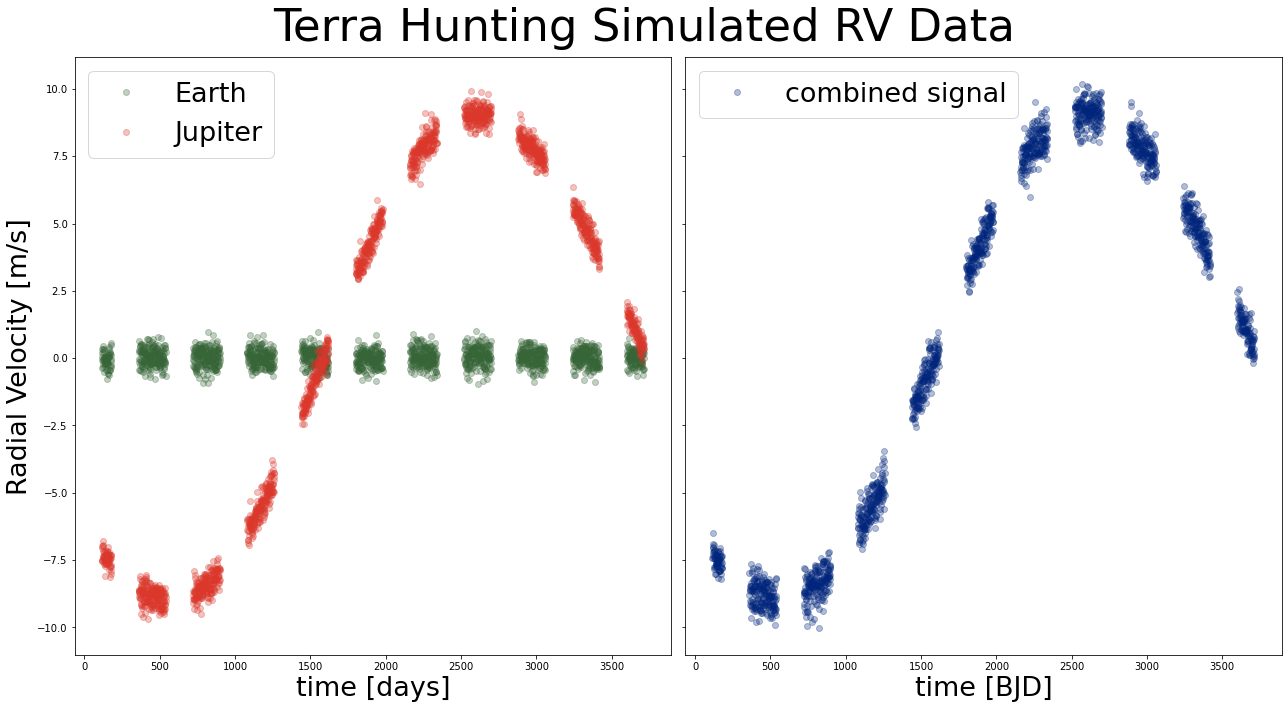

In [14]:
plot_rv(
    2, 
    rv_orbit, 
    rv_orbit_sum, 
    rv_sim, 
    rv_sim_sum, 
    times_rv, 
    times_observed_rv,
    ['#366537', '#db372b', '#00257c'],
    ['Earth', 'Jupiter'])



In [20]:
def plot_astrometry(
    n_planets, 
    ra_orbit, 
    ra_orbit_sum, 
    ra_sim, 
    ra_sim_sum, 
    dec_orbit, 
    dec_orbit_sum, 
    dec_sim, 
    dec_sim_sum,
    times_astrometry,
    times_observed_astrometry,
    colors,
    planet_names):
    
    

    fig, ax = plt.subplots(2, 2, figsize = [13,10], sharex='col', sharey='row')
    fig.suptitle("Gaia + Roman Simulated Astrometric Data", fontsize = 45)
    ax0 = ax[0][0]
    ax1 = ax[1][0]
    ax2 = ax[0][1]
    ax3 = ax[1][1]
    
    if n_planets > 1:
        for ii in range(0, n_planets):
            ax0.plot(times_observed_astrometry, ra_sim.T[ii], 'o', color = colors[ii], label = planet_names[ii])
    else:
        ax0.plot(times_observed_astrometry, ra_sim, 'o', color = colors[0], label = planet_names[0])
    
    ax0.set_ylabel(r"$\Delta \alpha \cos \delta$ ['']", fontsize = 27)
    for tick in ax0.get_xticklabels():
        tick.set_rotation(30)
    ax0.legend(fontsize = 27, loc = 2)
    
    
    
    if n_planets > 1:
        for ii in range(0, n_planets):
            ax1.plot(times_observed_astrometry, dec_sim.T[ii], 'o', color = colors[ii], label = planet_names[ii])
    else:
        ax1.plot(times_observed_astrometry, dec_sim, 'o',  color = colors[0], label = planet_names[0])

    
    ax1.set_ylabel(r"$\Delta \delta$ ['']", fontsize = 27)
    ax0.set_xlabel("time [days]", fontsize = 27)
    ax1.set_xlabel("time [days]", fontsize = 27)
    ax1.legend(fontsize = 27, loc = 2)

    


    
    ax2.plot(times_observed_astrometry, ra_sim_sum, 'o', color = colors[n_planets], label = 'combined signal')
    for tick in ax3.get_xticklabels():
        tick.set_rotation(30)
    ax2.legend(fontsize = 27, loc = 2)
    
    ax3.plot(times_observed_astrometry, dec_sim_sum, 'o', color = colors[n_planets], label = 'combined signal')
    ax2.set_xlabel("time [days]", fontsize = 27)
    ax3.set_xlabel("time [days]", fontsize = 27)
    ax3.legend(fontsize = 27, loc = 2)



    fig.tight_layout()
    fig.savefig('final_figures/astometry_ts_data.pdf')
    
    fig.show()



    #######
    #######
    #######



    # plot simulated orbit
    fig, ax = plt.subplots(2, 1, figsize = [13, 5])

    ax[0].plot(ra_sim_sum, dec_sim_sum, 'o', color = colors[n_planets], label = "combined signal")

    ax[0].set_ylabel(r"$\Delta \delta$ ['']")
    ax[0].set_xlabel(r"$\Delta \alpha \cos \delta$ ['']")
    ax[0].invert_xaxis()
    ax[0].plot(0, 0, "k*")
    ax[0].set_aspect("equal", "datalim")
    
    ax[0].legend(loc=1, fontsize = 27)
    
    
    ax[1].plot(ra_sim_sum, dec_sim_sum, 'o', color = colors[n_planets], label = "combined signal")

    ax[1].set_ylabel(r"$\Delta \delta$ ['']")
    ax[1].set_xlabel(r"$\Delta \alpha \cos \delta$ ['']")
    ax[1].invert_xaxis()
    ax[1].plot(0, 0, "k*")
    ax[1].set_aspect("equal", "datalim")
    ax[1].set_title("Gaia + Roman Simulated Orbit Data")
    ax[1].legend(loc=1, fontsize = 27)
    
    fig.suptitle("Gaia + Roman Simulated Orbit Data")
    fig.tight_layout()
    fig.savefig('final_figures/astometry_raw_data.pdf')
    
    fig.show()
    
    
    return None

<ipython-input-20-dc2ee8358d78>:69: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-20-dc2ee8358d78>:95: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


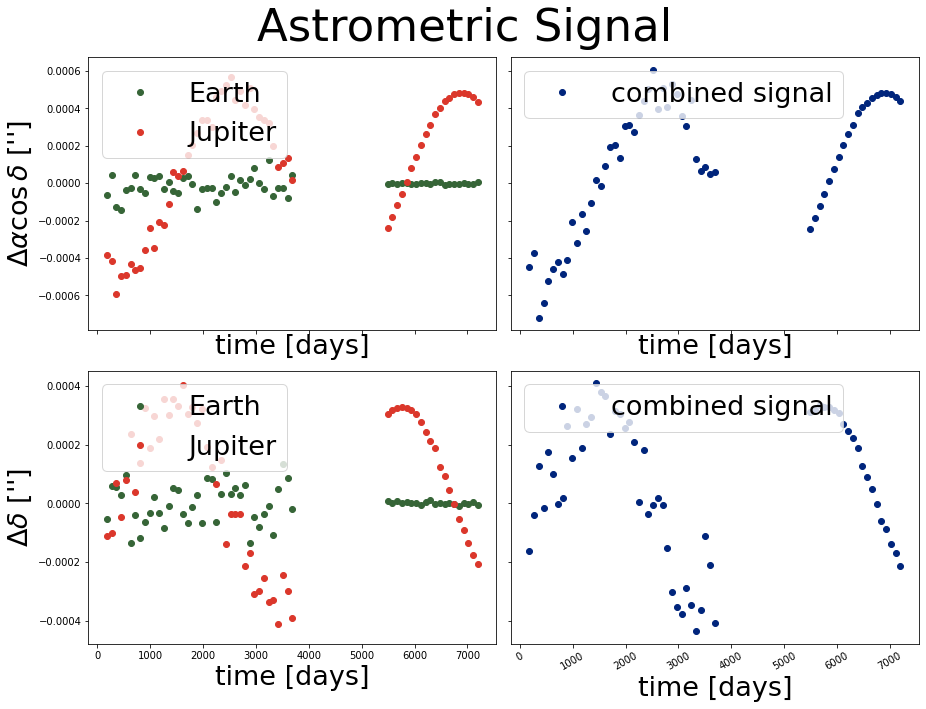

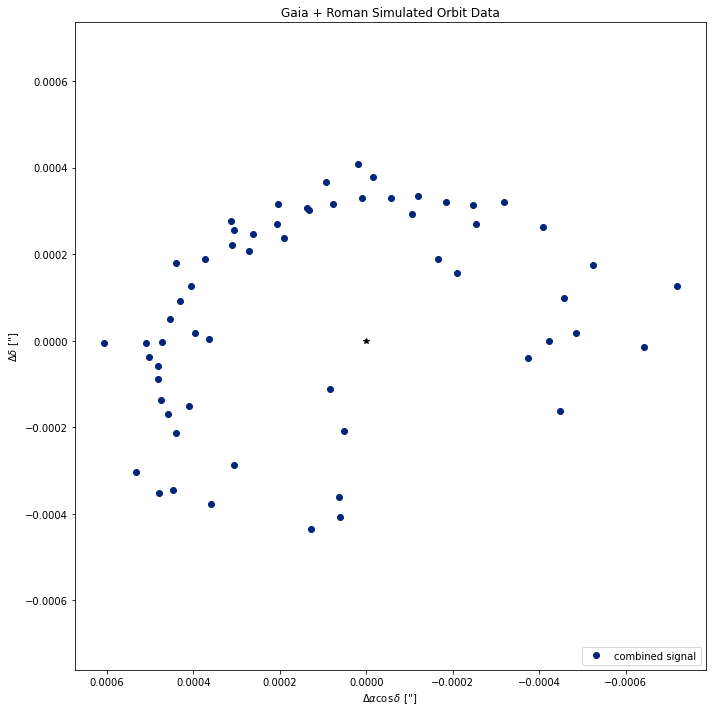

In [21]:
plot_astrometry(
    n_planets, 
    ra_orbit, 
    ra_orbit_sum, 
    ra_sim, 
    ra_sim_sum, 
    dec_orbit, 
    dec_orbit_sum, 
    dec_sim, 
    dec_sim_sum,
    times_astrometry,
    times_observed_astrometry,
    ['#366537', '#db372b', '#00257c'],
    ['Earth', 'Jupiter'])